# Exploratory Data Analysis (EDA)

### Modules

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import sys
sys.path.append("..")
from functions import create_ABT
import seaborn as sns
import matplotlib.pyplot as plt

### Getting the data

In [2]:
db_path = '../db/home_credit.db'
query_folder = '../.queries'

In [3]:
df = create_ABT(query_folder,db_path)

In [4]:
display(df)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_YEAR,MORE_THAN_120_DAYS_OVERDUE_ON_12M_FLAG,AMT_CREDIT_ACTIVE,HAS_DEBT,AMT_DAYS_OVERDUE,AMT_APPROVED_PREVIOUS_HC_LOAN,DAYS_OF_RELATIONSHIP,MAX_DAYS_DELAYED_INSTALLMENT_PAYMENT,MEAN_DAYS_DELAYED_INSTALLMENT_PAYMENT,ACCUMULATED_INSTALLMENT_PAYMENT_MISSING
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1.0,0.0,2.0,1.0,0.0,1.0,606.0,0.0,0.000000,0.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,NaN,1.0,0.0,0.0,3.0,2341.0,0.0,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,NaN,0.0,0.0,0.0,1.0,815.0,0.0,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,5.0,617.0,0.0,0.000000,0.000000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,NaN,0.0,0.0,0.0,6.0,2357.0,12.0,0.954545,0.999950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,NaN,NaN,NaN,NaN,NaN,1.0,273.0,0.0,0.000000,0.000000
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,NaN,NaN,NaN,NaN,NaN,1.0,2497.0,3.0,0.500000,0.000000
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,1.0,0.0,2.0,1.0,0.0,2.0,2851.0,9.0,0.642857,0.993136
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,0.0,2.0,322.0,0.0,0.000000,0.000000


## 1 Target

Target:
8.07% paid and
91.93% defaulting


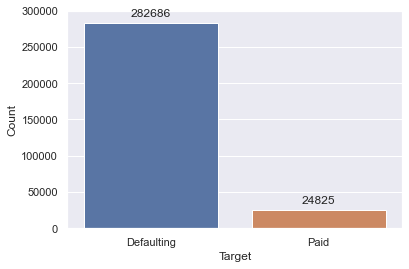

In [5]:
target_porc = pd.Series((df['TARGET'].value_counts(normalize=True)*100).values)
print(f'Target:\n{target_porc[1]:.2f}% paid and\n{target_porc[0]:.2f}% defaulting')

sns.set_theme(style="darkgrid")
ax = sns.countplot(x="TARGET", data=df)
ax.set(xlabel='Target',
       ylabel='Count',
       ylim=(0, 300000),
       xticklabels=['Defaulting','Paid'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

## 2 Gender

Distribution (%)
TARGET CODE_GENDER                  
0      F                   61.226428
       M                   30.699390
1      F                    4.607965
       M                    3.464917
0      XNA                  0.001301

<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

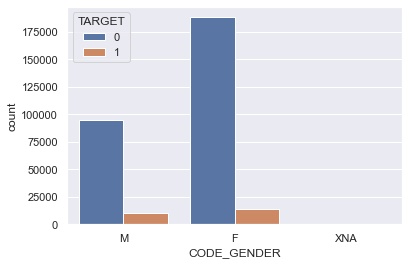

In [6]:
gender_porc = pd.DataFrame(df[['TARGET','CODE_GENDER']].value_counts(normalize=True)*100,columns=['Distribution (%)'])
display(gender_porc)

sns.set_theme(style="darkgrid")
sns.countplot(x="CODE_GENDER", hue="TARGET", data=df)

## 3 Contract type

Distribution (%)
TARGET NAME_CONTRACT_TYPE                  
0      Cash loans                 82.927440
       Revolving loans             8.999678
1      Cash loans                  7.551275
       Revolving loans             0.521607

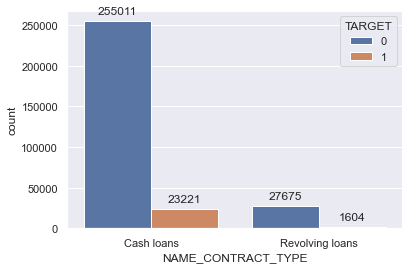

In [7]:
contract_porc = pd.DataFrame(df[['TARGET','NAME_CONTRACT_TYPE']].value_counts(normalize=True)*100,columns=['Distribution (%)'])
display(contract_porc)

ax2 = sns.countplot(x="NAME_CONTRACT_TYPE", hue="TARGET", data=df)
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

## 4 Car and realty

Distribution (%)
TARGET FLAG_OWN_CAR FLAG_OWN_REALTY                  
0      N            Y                       42.039147
       Y            Y                       21.805399
       N            N                       18.340807
       Y            N                        9.741765
1      N            Y                        3.797263
                    N                        1.811968
       Y            Y                        1.725467
                    N                        0.738185

[[Text(0, 0, 'Car + realty'),
  Text(1, 0, 'Only car'),
  Text(2, 0, 'Only realty'),
  Text(3, 0, 'Neither')]]

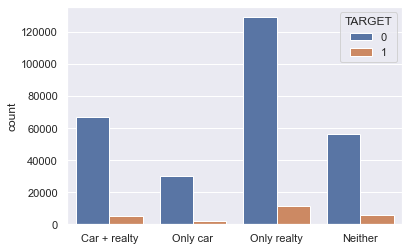

In [8]:
display(pd.DataFrame(df[['TARGET','FLAG_OWN_CAR','FLAG_OWN_REALTY']].value_counts(normalize=True)*100,columns=['Distribution (%)']))

sdf = df['FLAG_OWN_CAR'] + df['FLAG_OWN_REALTY']
sns.countplot(data=df, x=sdf, hue='TARGET', order=['YY','YN','NY','NN']).set(xticklabels=['Car + realty','Only car','Only realty','Neither'])

## 5 At least 120 days overdue on the past 12 months in previous Home Credit loans

,,Distribution (%)
TARGET,MORE_THAN_120_DAYS_OVERDUE_ON_12M_FLAG,
0,0.0,90.844484
1,0.0,8.046194
0,1.0,0.981622
1,1.0,0.127700


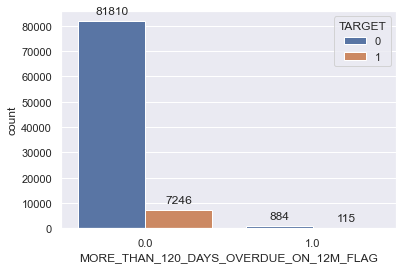

In [9]:
display(pd.DataFrame(df[['TARGET','MORE_THAN_120_DAYS_OVERDUE_ON_12M_FLAG']].value_counts(normalize=True)*100,columns=['Distribution (%)']))
ax = sns.countplot(x="MORE_THAN_120_DAYS_OVERDUE_ON_12M_FLAG", hue="TARGET", data=df)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

## 6 Amount of credits active at the moment of application

Orange: paid; Blue: Defaulting


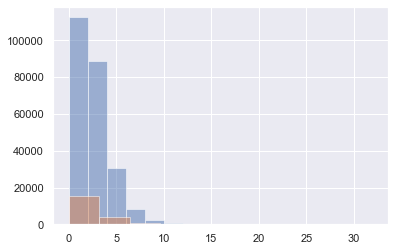

In [10]:
df.loc[df["TARGET"]==0]['AMT_CREDIT_ACTIVE'].hist(alpha = 0.5)
df.loc[df["TARGET"]==1]['AMT_CREDIT_ACTIVE'].hist(alpha = 0.5)
print("Orange: paid; Blue: Defaulting")

## 7 Has active debt

Distribution (%)
TARGET HAS_DEBT                  
0      1.0              64.241283
       0.0              28.028661
1      1.0               6.045368
       0.0               1.684688

<AxesSubplot:xlabel='HAS_DEBT', ylabel='count'>

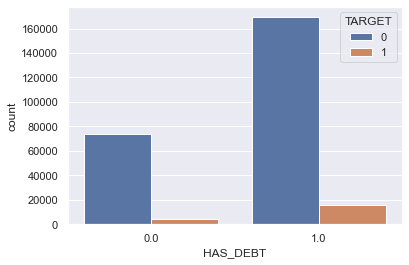

In [11]:
df['HAS_DEBT']
debt_porc = pd.DataFrame(df[['TARGET','HAS_DEBT']].value_counts(normalize=True)*100,columns=['Distribution (%)'])
display(debt_porc)

sns.set_theme(style="darkgrid")
sns.countplot(x="HAS_DEBT", hue="TARGET", data=df)

## 8 Total amount of days overdue at the time of application

In [12]:
df[['AMT_DAYS_OVERDUE']].describe(percentiles=[1/4, 2/4, 3/4, 9/10, 99/100])

,AMT_DAYS_OVERDUE
count,263491.000000
mean,4.942575
std,92.513420
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
90%,0.000000
99%,17.000000
max,5250.000000


Data was limited to up to 17 to remove outliers in favor of the visualization of data distribution.

Considering all values

Orange: paid; Blue: Defaulting


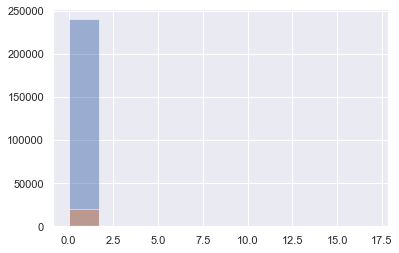

In [13]:
df.loc[(df['TARGET']==0) & (df['AMT_DAYS_OVERDUE']<=17)]['AMT_DAYS_OVERDUE'].hist(alpha = 0.5)
df.loc[(df['TARGET']==1) & (df['AMT_DAYS_OVERDUE']<=17)]['AMT_DAYS_OVERDUE'].hist(alpha = 0.5)
print("Orange: paid; Blue: Defaulting")

Excluding values equal to 0 (zero)

Orange: paid; Blue: Defaulting


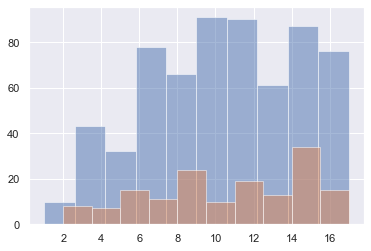

In [14]:
df.loc[(df['AMT_DAYS_OVERDUE']!=0) & (df['TARGET']==0) & (df['AMT_DAYS_OVERDUE']<=17)]['AMT_DAYS_OVERDUE'].hist(alpha = 0.5)
df.loc[(df['AMT_DAYS_OVERDUE']!=0) & (df['TARGET']==1) & (df['AMT_DAYS_OVERDUE']<=17)]['AMT_DAYS_OVERDUE'].hist(alpha = 0.5)
print("Orange: paid; Blue: Defaulting")

## 9 Amount of approved loans from previous applications with Home Credit

In [15]:
df[['AMT_APPROVED_PREVIOUS_HC_LOAN']].describe(percentiles=[1/4, 2/4, 3/4, 9/10, 99/100])

,AMT_APPROVED_PREVIOUS_HC_LOAN
count,291057.000000
mean,3.044417
std,2.124588
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
90%,6.000000
99%,10.000000
max,27.000000


Distribution (%)
TARGET Amount of approved loans                  
0      (1.0, 3.0]                       37.654480
       (-0.001, 1.0]                    24.173615
       (4.0, 27.0]                      18.599793
       (3.0, 4.0]                       11.379558
1      (1.0, 3.0]                        3.446060
       (-0.001, 1.0]                     2.498823
       (4.0, 27.0]                       1.373958
       (3.0, 4.0]                        0.873712

<AxesSubplot:>

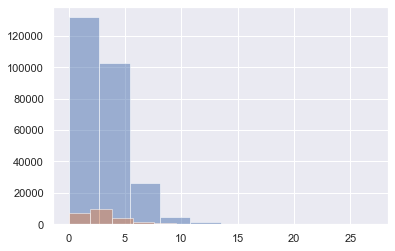

In [16]:
df['Amount of approved loans'] = pd.qcut(df['AMT_APPROVED_PREVIOUS_HC_LOAN'],q=4)
prev_porc = pd.DataFrame(df[['TARGET','Amount of approved loans']].value_counts(normalize=True)*100,columns=['Distribution (%)'])
display(prev_porc)

df.loc[df['TARGET']==0]['AMT_APPROVED_PREVIOUS_HC_LOAN'].hist(alpha = 0.5)
df.loc[df['TARGET']==1]['AMT_APPROVED_PREVIOUS_HC_LOAN'].hist(alpha = 0.5)

## 10 Time of relationship with Home Credit (in days)

In [17]:
df[['DAYS_OF_RELATIONSHIP']].describe()

,DAYS_OF_RELATIONSHIP
count,290065.000000
mean,1530.571334
std,862.867945
min,2.000000
25%,720.000000
50%,1490.000000
75%,2379.000000
max,2922.000000


<AxesSubplot:>

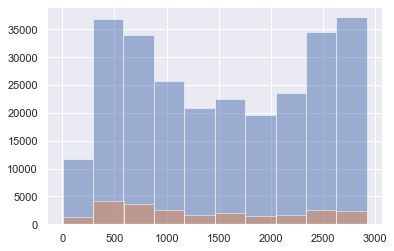

In [18]:
df.loc[df['TARGET']==0]['DAYS_OF_RELATIONSHIP'].hist(alpha=0.5)
df.loc[df['TARGET']==1]['DAYS_OF_RELATIONSHIP'].hist(alpha=0.5)

## 11 Longest time of delay in paying previous installments (in days)

In [19]:
df[['MAX_DAYS_DELAYED_INSTALLMENT_PAYMENT']].describe(percentiles=[1/4, 2/4, 3/4, 9/10, 99/100])

,MAX_DAYS_DELAYED_INSTALLMENT_PAYMENT
count,290131.000000
mean,18.255981
std,109.674935
min,0.000000
25%,0.000000
50%,1.000000
75%,9.000000
90%,25.000000
99%,355.000000
max,2882.000000


100% of data:

<AxesSubplot:>

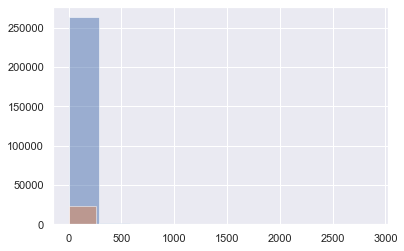

In [20]:
df.loc[df['TARGET']==0]['MAX_DAYS_DELAYED_INSTALLMENT_PAYMENT'].hist(alpha=0.5)
df.loc[df['TARGET']==1]['MAX_DAYS_DELAYED_INSTALLMENT_PAYMENT'].hist(alpha=0.5)

90% of data:

<AxesSubplot:>

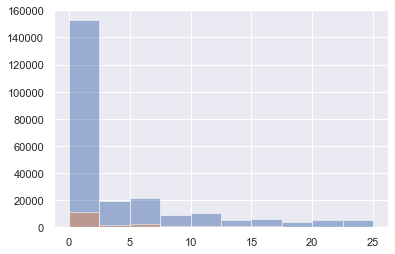

In [21]:
df.loc[(df['TARGET']==0) & (df['MAX_DAYS_DELAYED_INSTALLMENT_PAYMENT']<=25)]['MAX_DAYS_DELAYED_INSTALLMENT_PAYMENT'].hist(alpha=0.5)
df.loc[(df['TARGET']==1) & (df['MAX_DAYS_DELAYED_INSTALLMENT_PAYMENT']<=25)]['MAX_DAYS_DELAYED_INSTALLMENT_PAYMENT'].hist(alpha=0.5)

## 12 Average time of delay of installments on paying past Home Credit loans (in days)

In [22]:
df[['MEAN_DAYS_DELAYED_INSTALLMENT_PAYMENT']].describe(percentiles=[1/4, 2/4, 3/4, 9/10, 99/100])

,MEAN_DAYS_DELAYED_INSTALLMENT_PAYMENT
count,290131.000000
mean,1.050434
std,8.832860
min,0.000000
25%,0.000000
50%,0.038462
75%,0.517493
90%,1.821429
99%,14.100000
max,1885.386364


<AxesSubplot:>

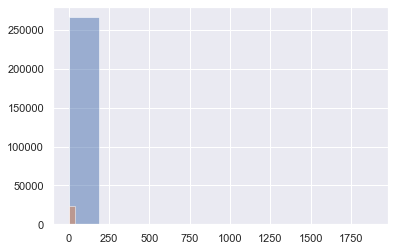

In [23]:
df.loc[df['TARGET']==0]['MEAN_DAYS_DELAYED_INSTALLMENT_PAYMENT'].hist(alpha=0.5)
df.loc[df['TARGET']==1]['MEAN_DAYS_DELAYED_INSTALLMENT_PAYMENT'].hist(alpha=0.5)

<AxesSubplot:>

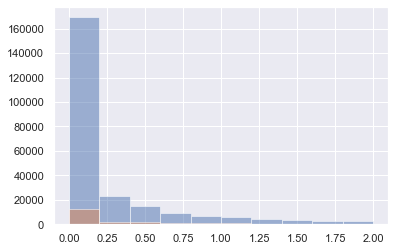

In [24]:
df.loc[(df['TARGET']==0) & (df['MEAN_DAYS_DELAYED_INSTALLMENT_PAYMENT']<=2)]['MEAN_DAYS_DELAYED_INSTALLMENT_PAYMENT'].hist(alpha=0.5)
df.loc[(df['TARGET']==1) & (df['MEAN_DAYS_DELAYED_INSTALLMENT_PAYMENT']<=2)]['MEAN_DAYS_DELAYED_INSTALLMENT_PAYMENT'].hist(alpha=0.5)

## 13 Accumulated debts of installments on paying past Home Credit loans (normalized)

In [25]:
df[['ACCUMULATED_INSTALLMENT_PAYMENT_MISSING']].describe(percentiles=[1/4, 2/4, 3/4, 9/10, 99/100])

,ACCUMULATED_INSTALLMENT_PAYMENT_MISSING
count,290131.000000
mean,0.404725
std,0.472351
min,0.000000
25%,0.000000
50%,0.000000
75%,0.985679
90%,0.999274
99%,0.999983
max,1.000000


<AxesSubplot:>

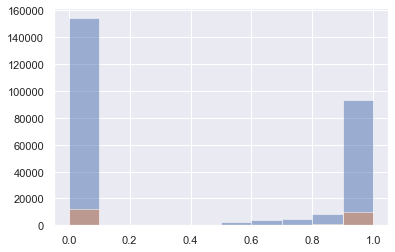

In [26]:
df.loc[df['TARGET']==0]['ACCUMULATED_INSTALLMENT_PAYMENT_MISSING'].hist(alpha=0.5)
df.loc[df['TARGET']==1]['ACCUMULATED_INSTALLMENT_PAYMENT_MISSING'].hist(alpha=0.5)